# Insurance Claim Fraud Detection project

In [2]:
#Importing the required Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import joblib
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#Loading the dataset

df=pd.read_csv('insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

# EDA(Exploratory Data Analysis)

In [4]:
#Checking the Rows and Columns

df.shape

(1000, 40)

There are 1000 rows and 40 Columns in dataset

In [5]:
#Checking the Columns

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
#Checking the Duplicates

df.duplicated().sum()

0

There are 0 duplicate in dataset

In [9]:
# checking null values in the dataset

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column _C39 is hvaing full NULL values, so we can drop the whole column

In [10]:
df.drop('_c39',axis=1,inplace=True)

In [14]:
# Checking Unique values in columns
for A in df.columns:
    print('Column Name :',A)
    print('There are the uniques Values of each Column',df[A].unique())
    print('--'*30)

Column Name : months_as_customer
There are the uniques Values of each Column [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 42

Observation:
    
Columns : collision_type,property_damage,police_report_available these columns have a unique value "?" which is incorrect for Analysis so replacing this with np.nan

In [15]:
df['collision_type'].replace('?', np.nan, inplace=True)
df['property_damage'].replace('?', np.nan, inplace=True)
df['police_report_available'].replace('?', np.nan, inplace=True)

In [16]:
#These columns are categorical column so we will fill their null values by their mode values
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

<Axes: >

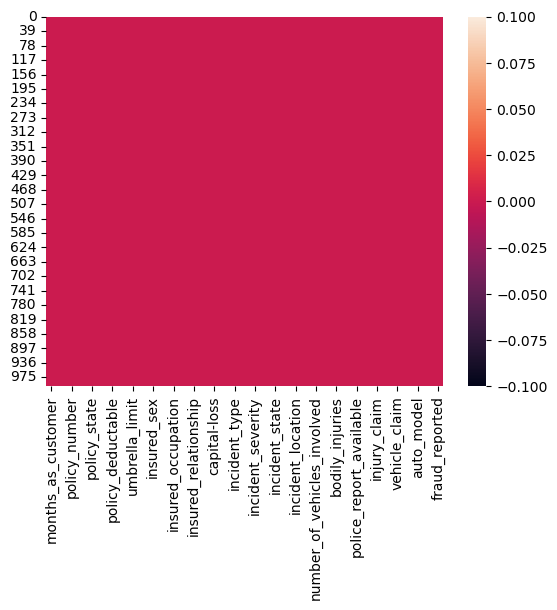

In [17]:
#Checking the Null Values with heatmnap

sns.heatmap(df.isnull())

NO Null values present in dataset

In [19]:
# Checking value counts 
for A in df.columns:
    print('Column Name :',A)
    print(df[A].value_counts())
    print('--'*30)

Column Name : months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
------------------------------------------------------------
Column Name : age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
------------------------------------------------------------
Column Name : policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
------------------------------

**Now i will do feature engineering with date columns**

In [20]:
#There are 2 datetime column present in dataset

# handling the datetime values

# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])


# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year


# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [21]:
#Dropping policy_bind_date and incident_date columns as date time is extracted
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [23]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ...  auto_make auto_model auto_year fraud_reported  \
0        MALE  ...       Saab        92x      2004              Y   
1        MALE  ...   Mercedes       E400      2007              Y   
2      FEMALE  ...      Dodge        RAM      2007              N   
3      FEMALE  ...  Chevrolet      Tahoe      2014              Y   
4        MALE  ...     Accura        RSX      2009              N   

   policy_bind_day  policy_bind_month policy_bind_year incident_day  \
0               17                 10             2014           25   
1               27                  6             2006           21   
2                9                  6             2000           22   
3               25                  5             1990            1   
4                6                  6             2014           17   

  incident_month incident_year  
0              1          2015  
1              1          2015  
2              2          2015  
3             10          2015  
4              2          2015  

[5 rows x 43 columns]

Now i will handle policy_csl column because in this column numerical data separated by '/', resulting into object datatype.we will split the column into two part CSL_accditental and CSL_overall

The "policy_csl" column in your dataset likely represents the Combined Single Limit (CSL) in an insurance policy. CSL is a type of insurance coverage that combines both bodily injury liability and property damage liability coverage into a single limit. It means that the insurance policy will pay up to a certain total amount for all covered losses, which can be applied to bodily injury claims, property damage claims, or a combination of both

In [24]:
# Spliting and extracting policy_csl at '/'

df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Overall']=df.policy_csl.str.split('/',expand=True)[1]


# Now we can drop policy_csl column 

df.drop("policy_csl",axis=1,inplace=True)

In [25]:
# Saperating Numerical Discreate Contineous  And Categorical columns

numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
datetime_feature = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Datetime Feature Count: {}".format(len(datetime_feature)))

Numerical Features Count 24
Discrete feature Count 11
Continuous feature Count 13
Categorical feature Count 20
Datetime Feature Count: 0


In [26]:
#Statistical Information

df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  injury_claim  \
count    1000.000000               1000.000000  ...   1000.000000   
mean   -26793.700000                 11.644000  ...   7433.420000   
std     28104.096686                  6.951373  ...   4880.951853   
min   -111100.000000                  0.000000  ...      0.000000   
25%    -51500.000000                  6.000000  ...   4295.000000   
50%    -23250.000000                 12.000000  ...   6775.000000   
75%         0.000000                 17.000000  ...  11305.000000   
max         0.000000                 23.000000  ...  21450.000000   

       property_claim  vehicle_claim    auto_year  policy_bind_day  \
count     1000.000000    1000.000000  1000.000000      1000.000000   
mean      7399.570000   37928.950000  2005.103000        15.448000   
std       4824.726179   18886.252893     6.015861         8.850176   
min          0.000000      70.000000  1995.000000         1.000000   
25%       4445.000000   30292.500000  2000.000000         8.000000   
50%       6750.000000   42100.000000  2005.000000        16.000000   
75%      10885.000000   50822.500000  2010.000000        23.000000   
max      23670.000000   79560.000000  2015.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       incident_year  
count         1000.0  
mean          2015.0  
std              0.0  
min           2015.0  
25%           2015.0  
50%           2015.0  
75%           2015.0  
max           2015.0  

[8 rows x 24 columns]

**Summary:**
    
**Months as Customer:**
Average customer tenure is approximately 17 years (204 months).
Some customers are relatively new (minimum value: 0), while others have been with the company for up to 479 months.

**Age:**
Average customer age is around 39 years.
Customers range from 19 to 64 years old, showcasing a diverse age group.

**Policy Deductible:**
Policy deductibles range from 500 to 2000.
The mean deductible is approximately 1136.

**Policy Annual Premium:**
Mean annual premium is approximately 1256.41.
Premiums vary from 433.33 to 2047.59.

**Umbrella Limit:**
Umbrella limits span from -1,000,000 to 10,000,000.
The mean umbrella limit is 1,101,000.

**Capital Gains:**
Capital gains range from 0 to 100,500, with an average of 25,126.10.
Most customers have capital gains close to zero.

**Capital Loss:**
Capital losses range from -111,100 to 0, averaging -26,793.70.
The majority of customers incur losses, with a few experiencing no losses.

**Incident Hour of the Day:**
Incidents occur throughout the day, with an average incident hour around 11:38 AM.
The distribution appears even across the 24-hour period.

**Number of Vehicles Involved:**
Vehicles involved in incidents range from 1 to 4, averaging 1.84 vehicles.

**Bodily Injuries:**
Bodily injuries vary from 0 to 2, averaging 0.99 injuries.
These observations offer a comprehensive overview of numerical features in the dataset. Further analysis and visualization can unveil additional insights and patterns.

# Data Visualization

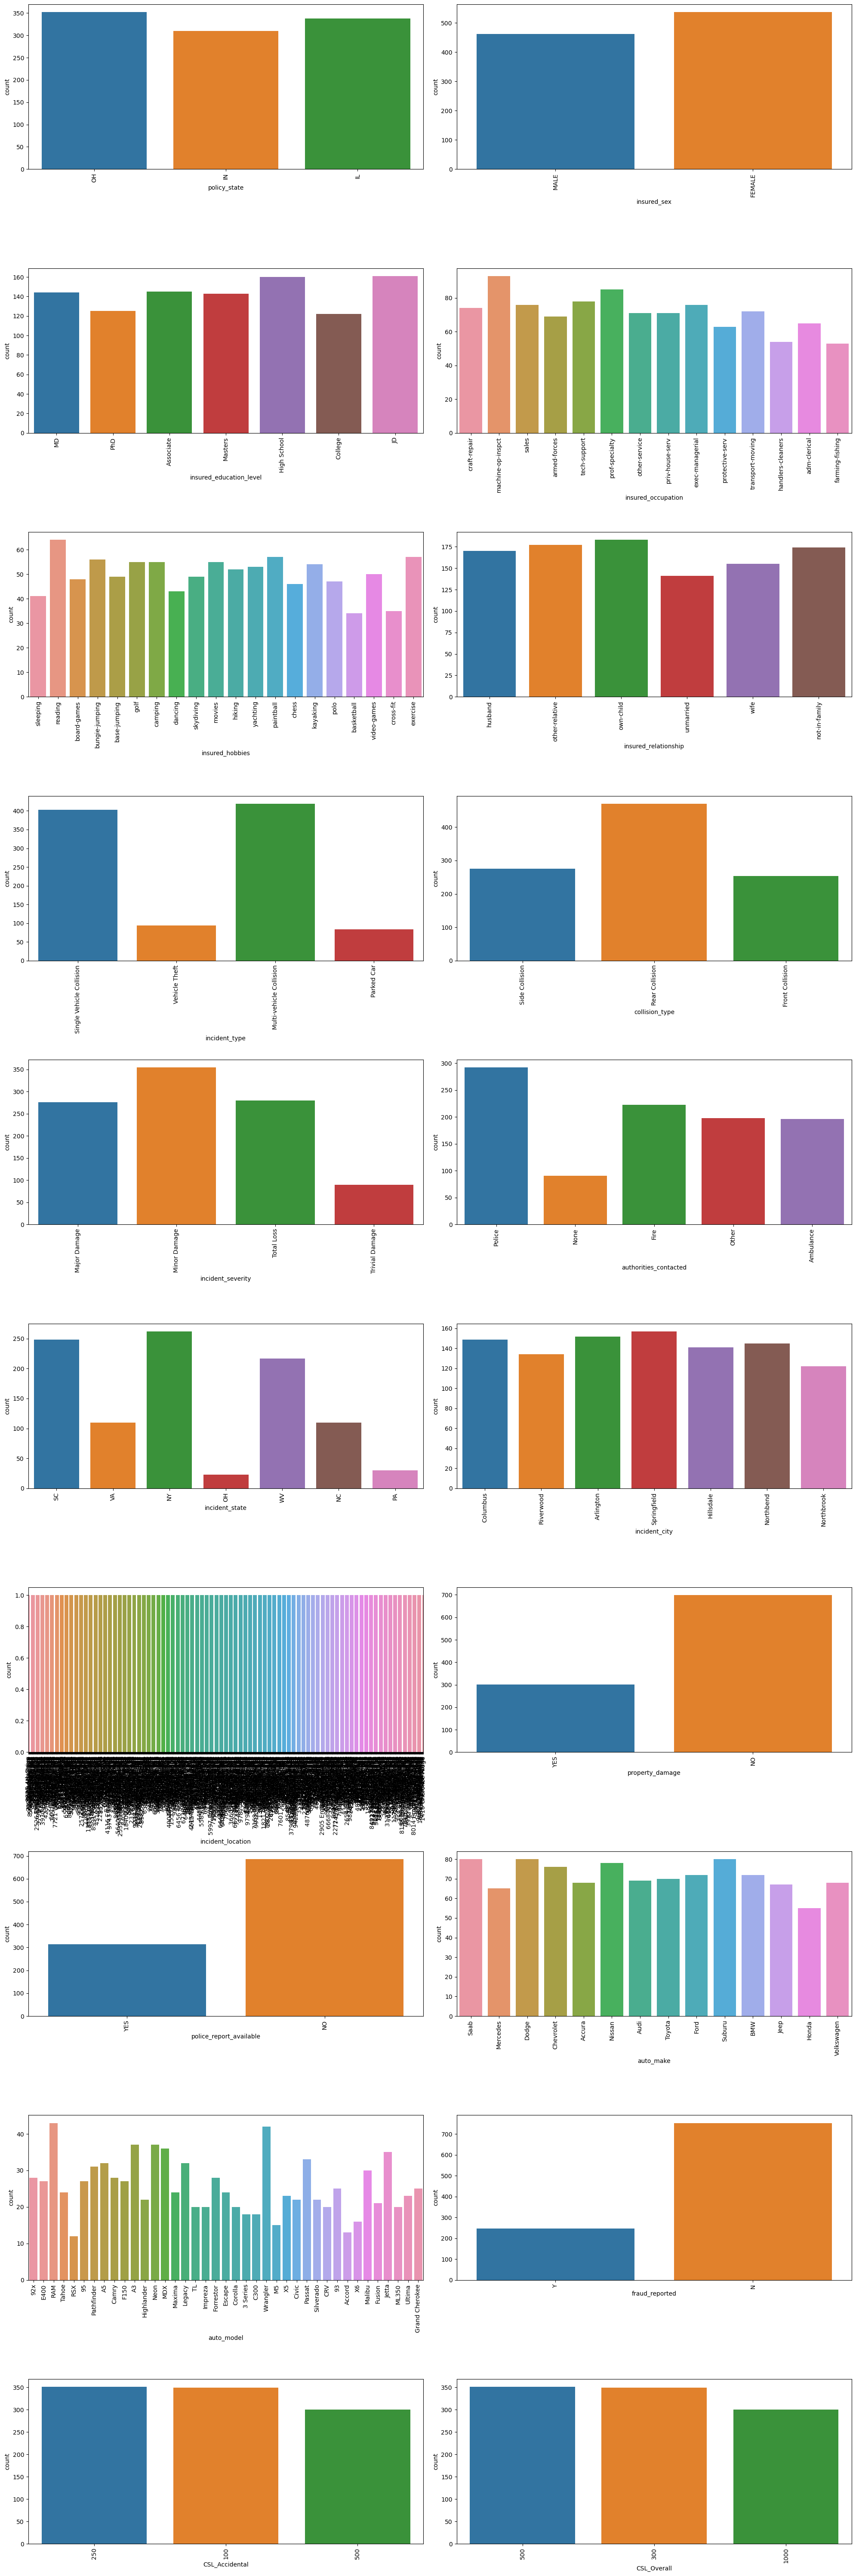

In [27]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))
# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(10, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

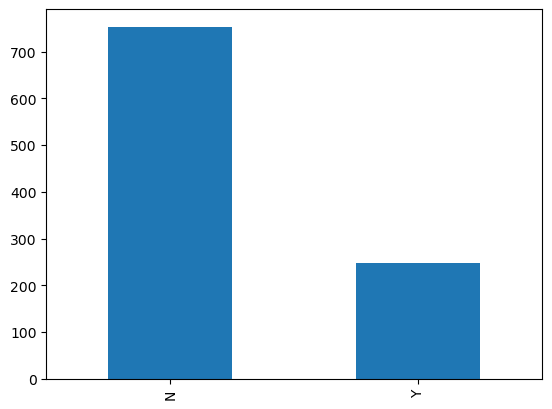

In [28]:
# checking the distribution in the target column 
df.fraud_reported.value_counts().plot(kind='bar')

Our target column is imbalanced



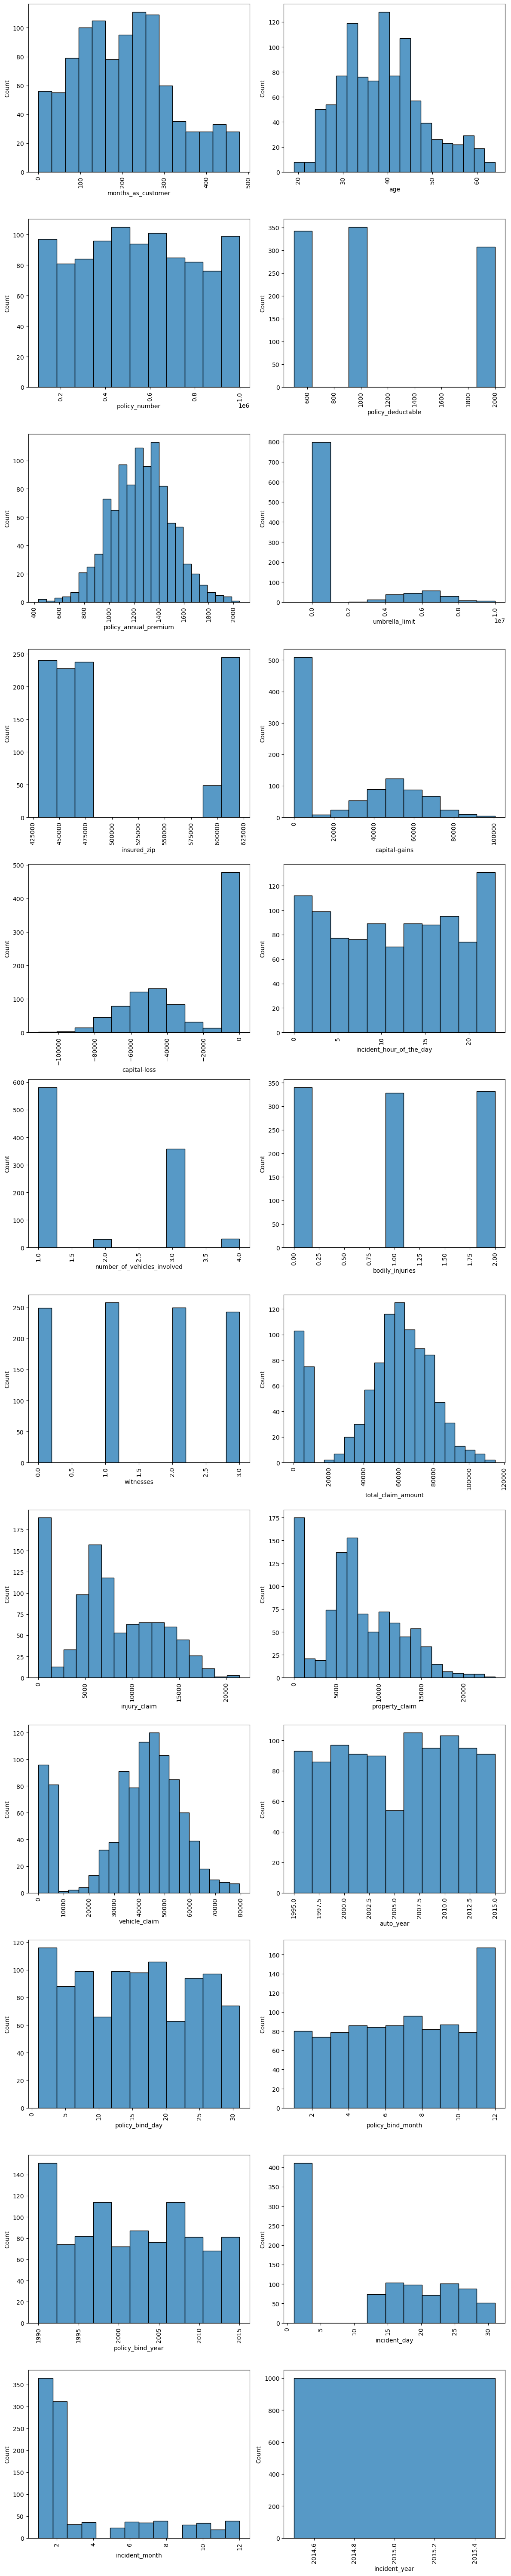

In [29]:
# Create the subplots
fig = plt.figure(figsize=(12, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

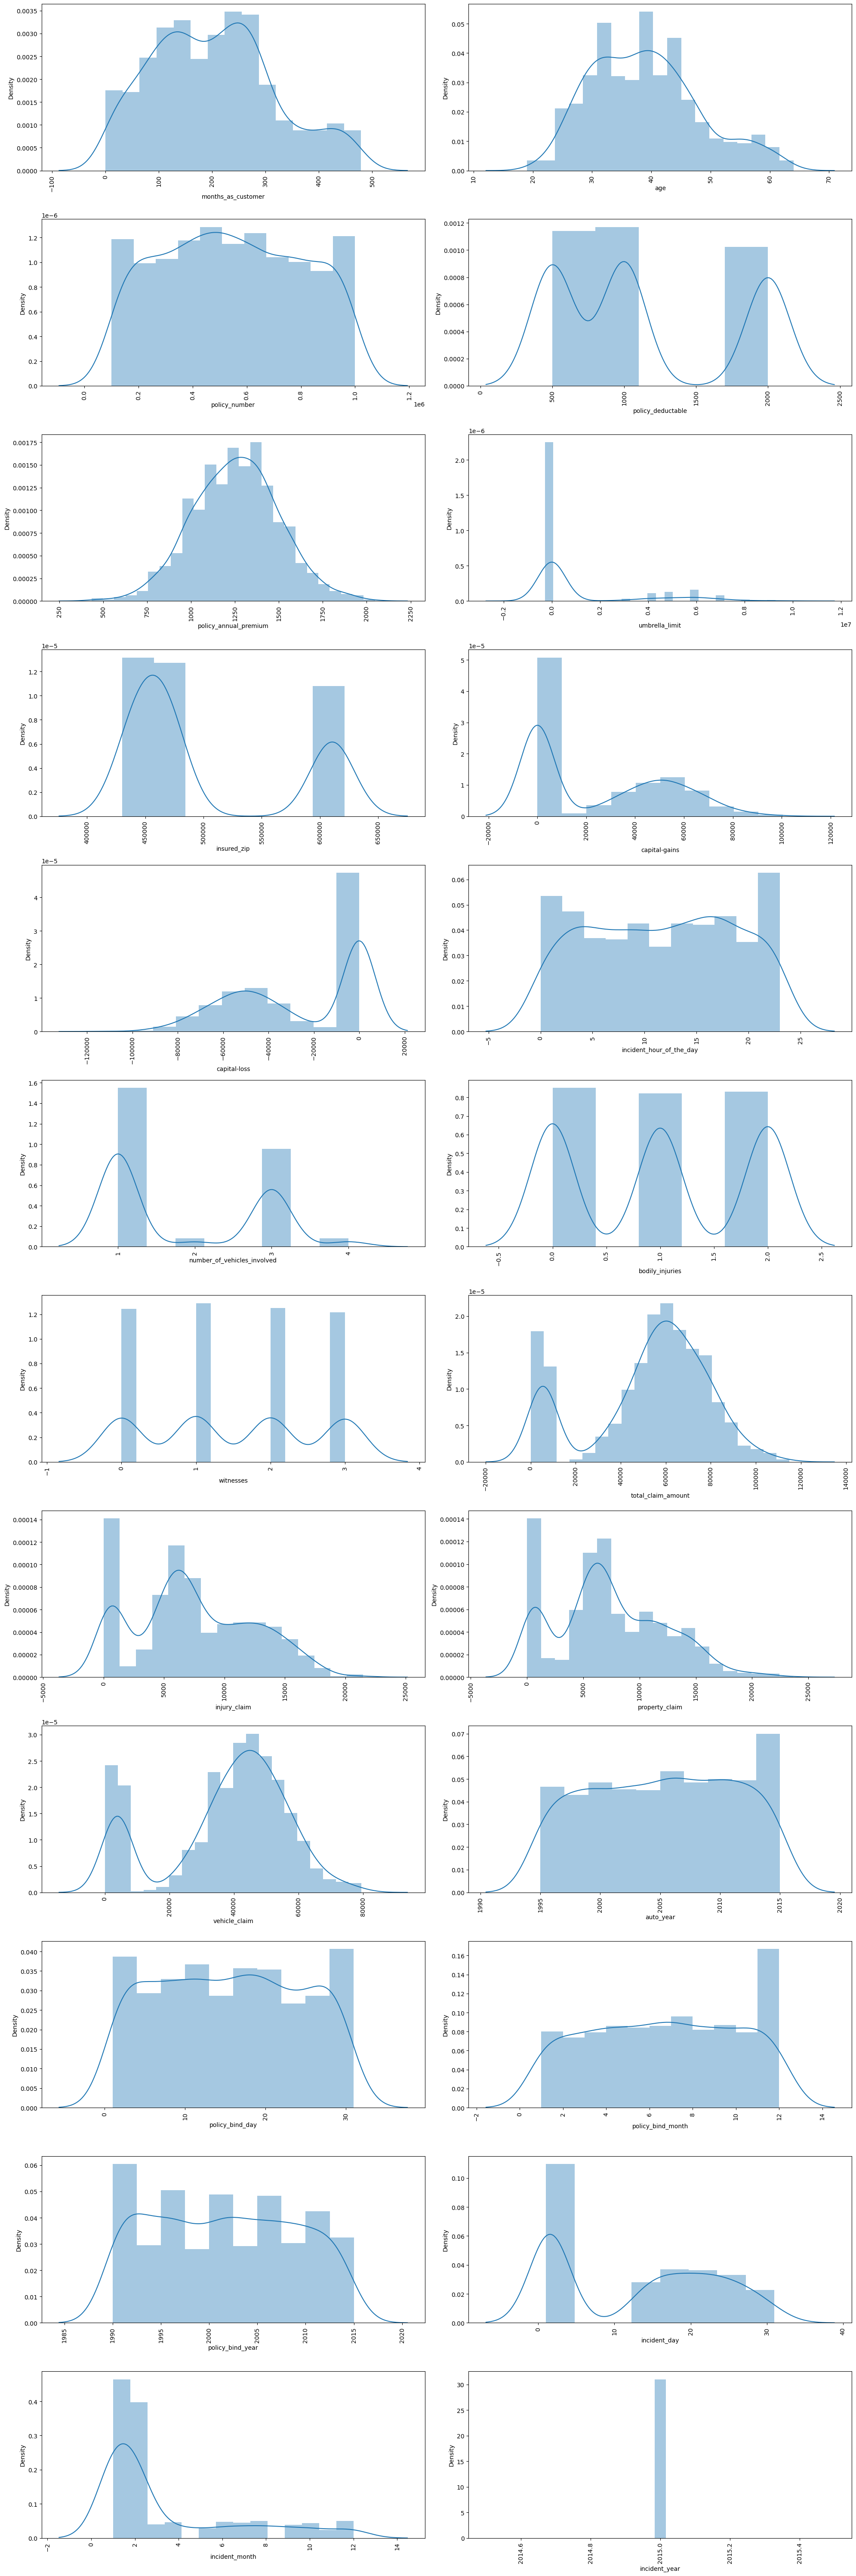

In [30]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Here we can see that some columns are not normally distributed



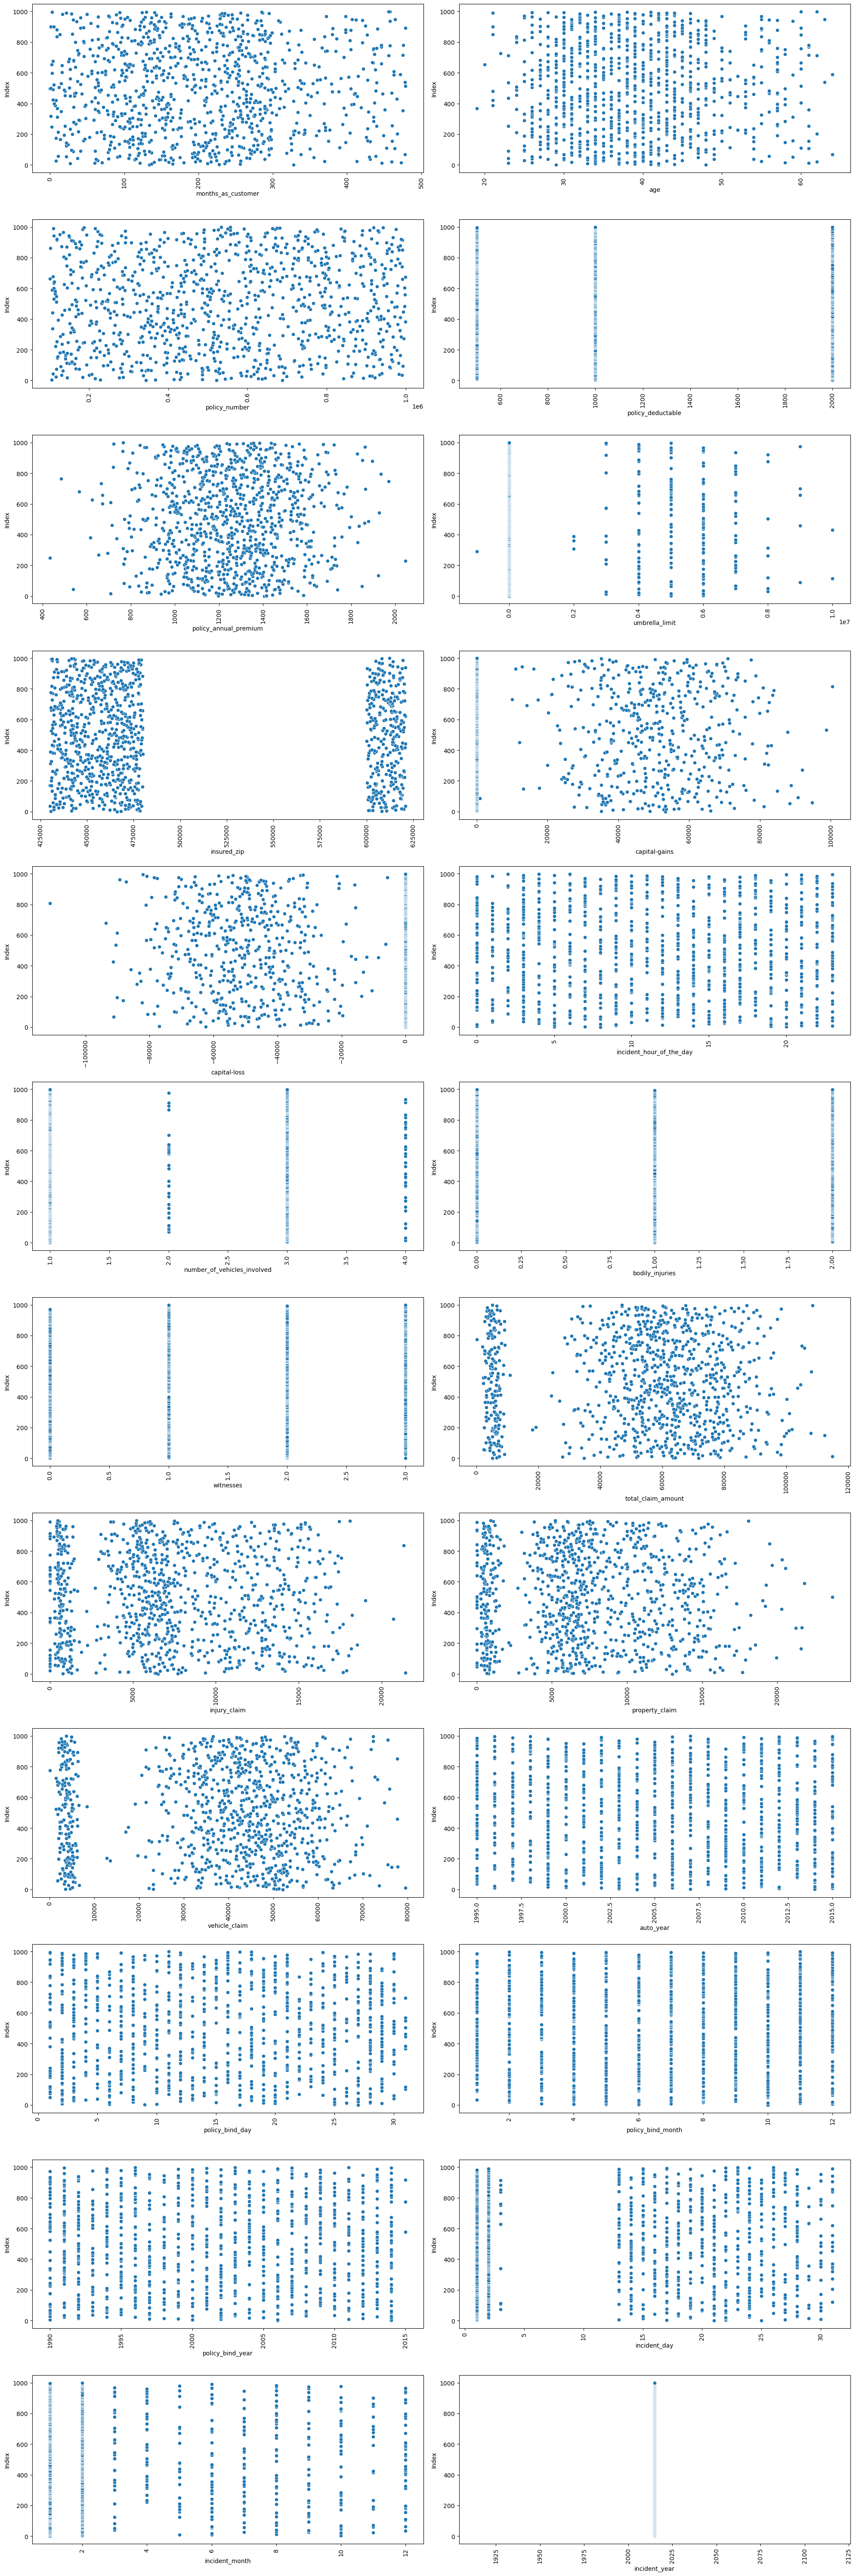

In [31]:
#we are plotting each numerical column against the index (row number) of the DataFrame
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=df.index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Index')

plt.tight_layout()
plt.show()

**bivariate analysis**

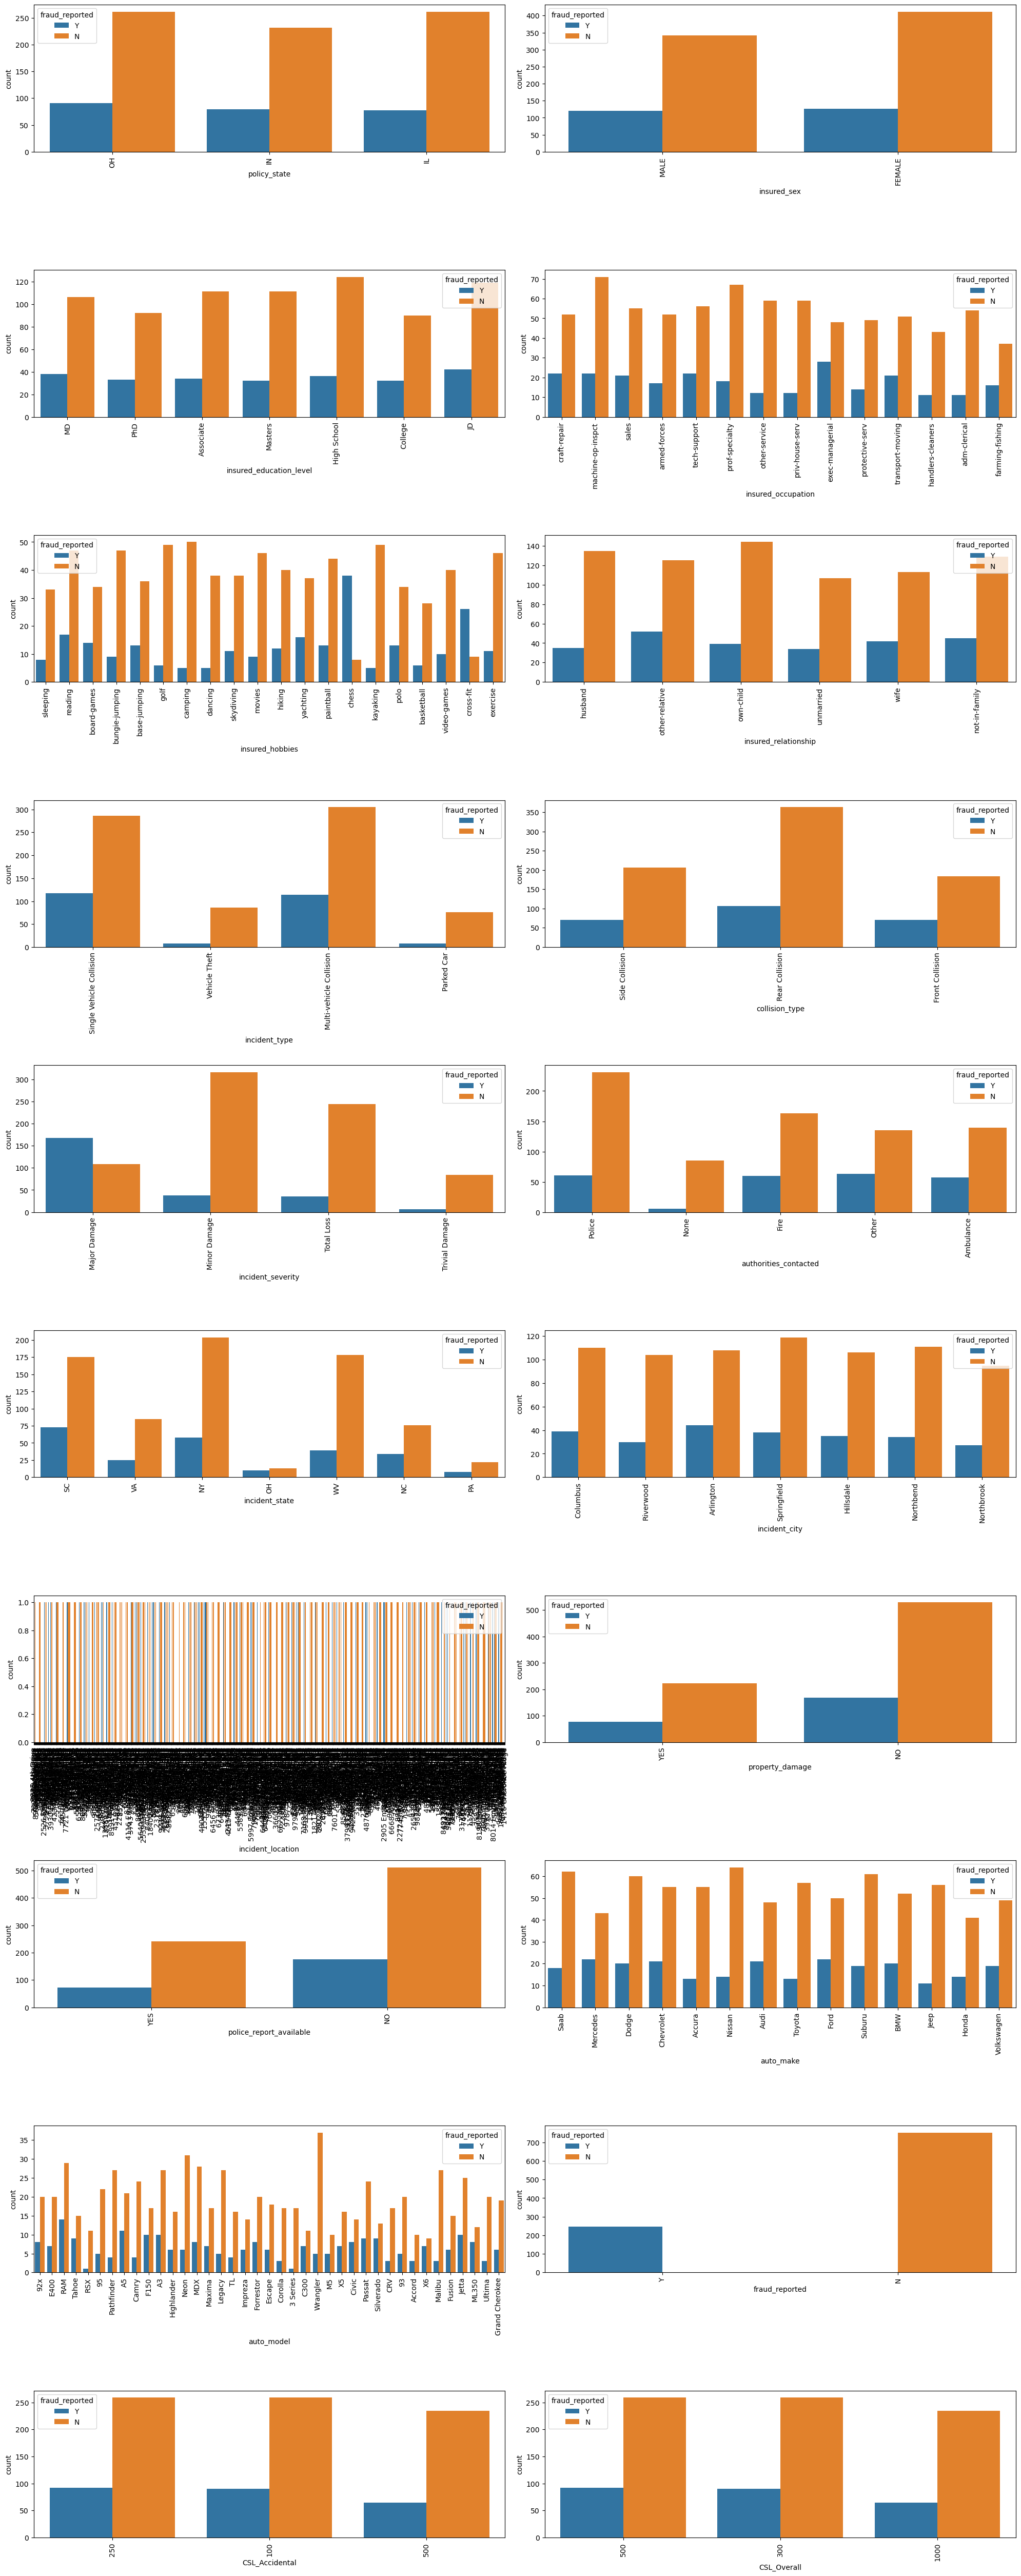

In [32]:
fig = plt.figure(figsize=(20, 60)) # bivariate analysis categorical and income column

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(12, 2, i + 1)
    sns.countplot(data=df, x=col,hue=df['fraud_reported'])
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
for i in categorical_feature:
    print(f'fraud_reported distribution by {i}')
    print(df.groupby(i)['fraud_reported'].value_counts())
    print('--'*30)

fraud_reported distribution by policy_state
policy_state  fraud_reported
IL            N                 261
              Y                  77
IN            N                 231
              Y                  79
OH            N                 261
              Y                  91
Name: fraud_reported, dtype: int64
------------------------------------------------------------
fraud_reported distribution by insured_sex
insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: fraud_reported, dtype: int64
------------------------------------------------------------
fraud_reported distribution by insured_education_level
insured_education_level  fraud_reported
Associate                N                 111
                         Y                  34
College                  N                  90
                         Y                  32
High School              

Observation :
    
Policy State:
IL and OH exhibit a notably higher percentage of reported fraud (Y) compared to IN.

Insured Sex:
Both genders (FEMALE and MALE) show similar percentages of reported fraud (Y).

Insured Education Level:
Holders of JD and MD degrees demonstrate higher percentages of reported fraud (Y).

Insured Occupation:
Occupations in Exec-managerial and prof-specialty categories show relatively higher percentages of reported fraud (Y).

Insured Hobbies:
Hobbies such as skydiving and chess are associated with elevated fraud reports.

Insured Relationship:
All relationship categories show some fraud reports, with a slightly higher percentage for husbands.

Incident Type:
Multi-vehicle Collision has a higher percentage of reported fraud compared to other incident types.

Collision Type:
Rear Collision has a higher percentage of reported fraud compared to Front and Side Collisions.

Incident Severity:
Incidents with Major Damage and Minor Damage have relatively higher percentages of reported fraud (Y).

Authorities Contacted:
Contacts with the Police and Other authorities show higher percentages of reported fraud.

Incident State:
SC and WV demonstrate relatively higher percentages of reported fraud (Y).

Incident City:
Arlington and Columbus cities exhibit higher percentages of reported fraud (Y).

Property Damage:
Policies without property damage claims (NO) are associated with higher fraud reports (Y).

Police Report Available:
Policies without police reports (NO) show higher percentages of reported fraud (Y).

Auto Make:
Audi, Mercedes, and Subaru have relatively higher percentages of reported fraud.

Auto Model:
Multiple auto models display varying percentages of reported fraud.

Combined Single Limit (CSL) - Accidental and Overall:
CSLs with lower limits (100 and 250) are associated with higher percentages of reported fraud (Y).

Fraud Reported:
A summary of the overall fraud report distribution, with the majority being non-fraudulent (N).

Please note that these observations are derived from the provided data and serve as initial insights for further analysis or modeling.


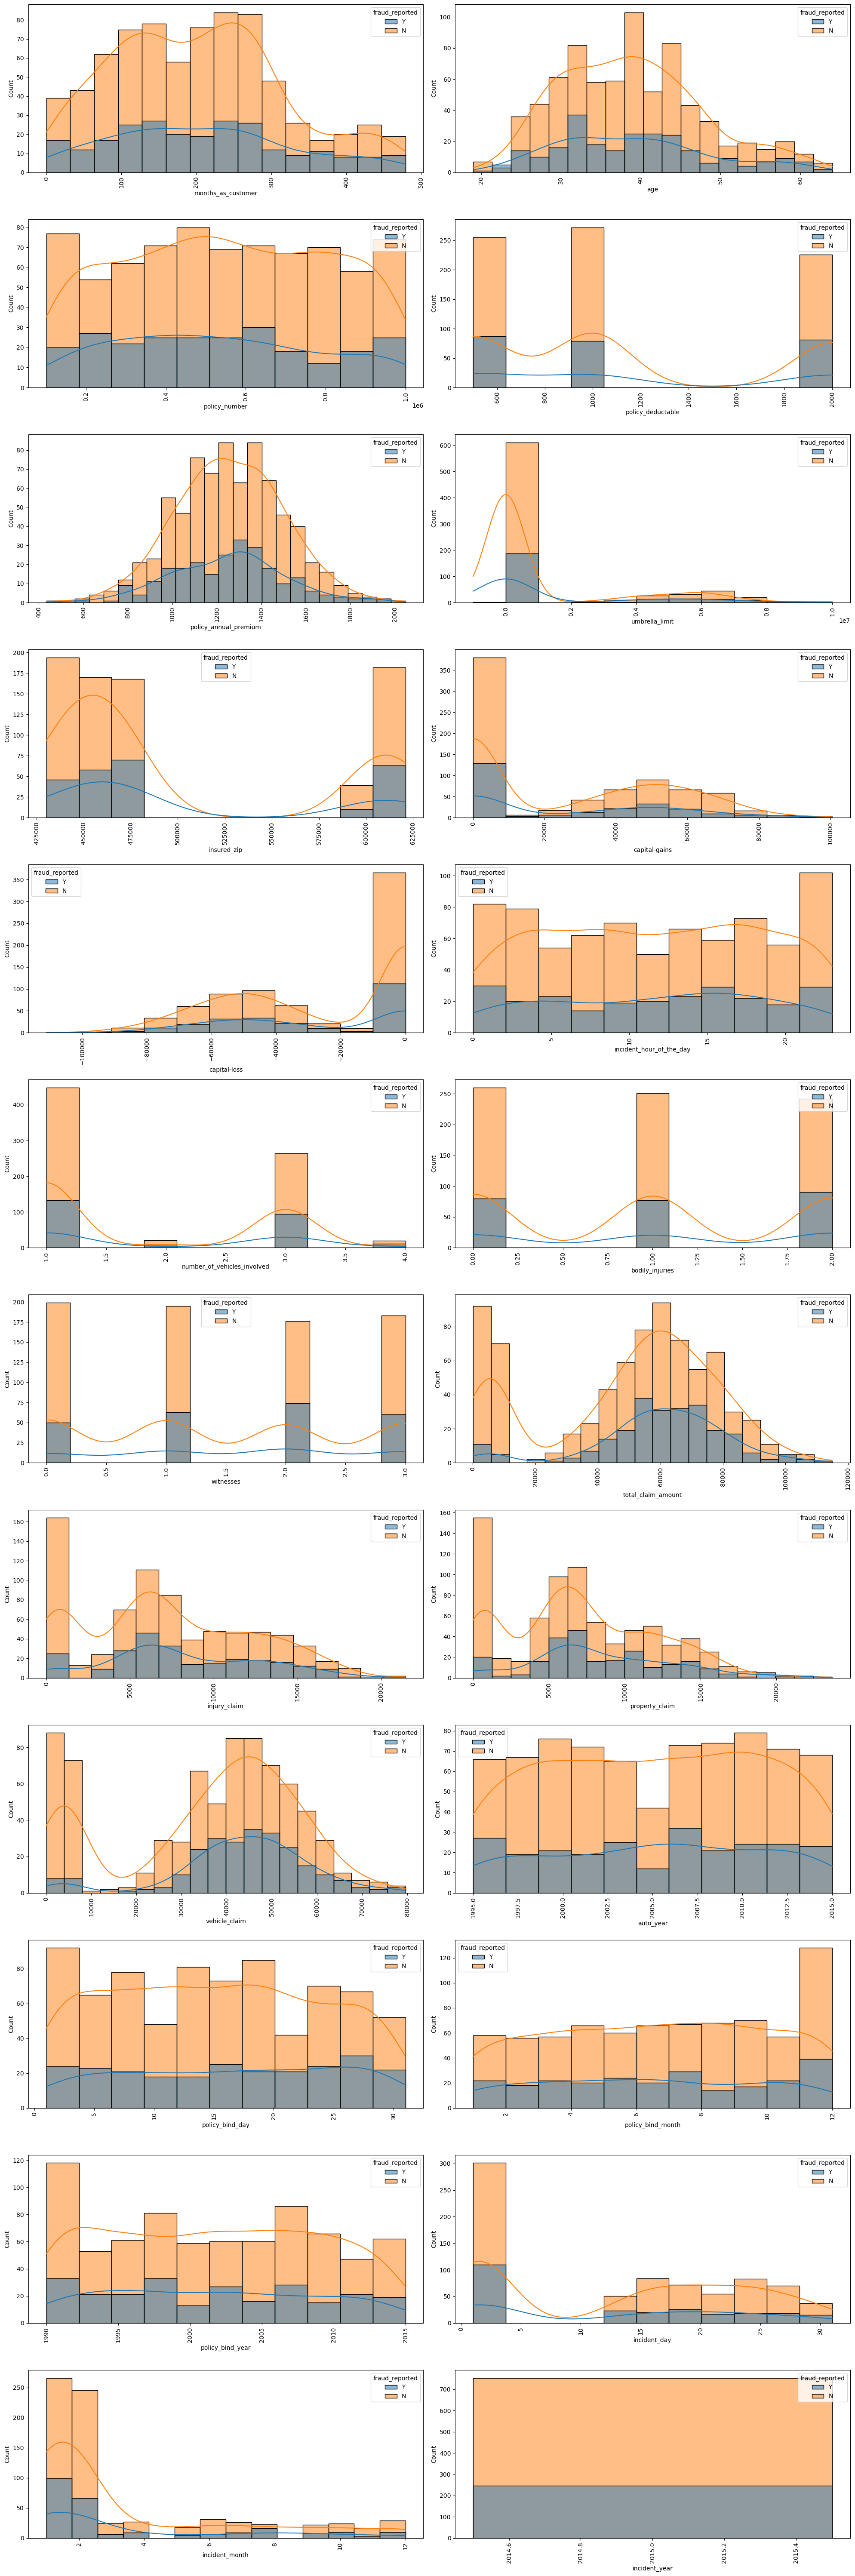

In [34]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col,hue=df['fraud_reported'],kde=True)
    plt.xlabel(col)
    plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [35]:
cross_table = pd.crosstab(df['incident_type'], df['collision_type'])
percentage_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percentage_table

collision_type            Front Collision  Rear Collision  Side Collision
incident_type                                                            
Multi-vehicle Collision         27.446301       36.276850       36.276850
Parked Car                       0.000000      100.000000        0.000000
Single Vehicle Collision        34.491315       34.739454       30.769231
Vehicle Theft                    0.000000      100.000000        0.000000

**Encoding categorical Feature**



In [36]:
# Using Label Encoder on categorical variable
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                 328   48         521585             2               1000   
1                 228   42         342868             1               2000   
2                 134   29         687698             2               2000   
3                 256   41         227811             0               2000   
4                 228   44         367455             0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  ...  auto_year  fraud_reported  policy_bind_day  \
0                        4  ...       2004               1               17   
1                        4  ...       2007               1               27   
2                        6  ...       2007               0                9   
3                        6  ...       2014               1               25   
4                        0  ...       2009               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25               1   
1                  6              2006            21               1   
2                  6              2000            22               2   
3                  5              1990             1              10   
4                  6              2014            17               2   

   incident_year  CSL_Accidental  CSL_Overall  
0           2015               1            2  
1           2015               1            2  
2           2015               0            1  
3           2015               1            2  
4           2015               2            0  

[5 rows x 44 columns]

**Handling Outliers**

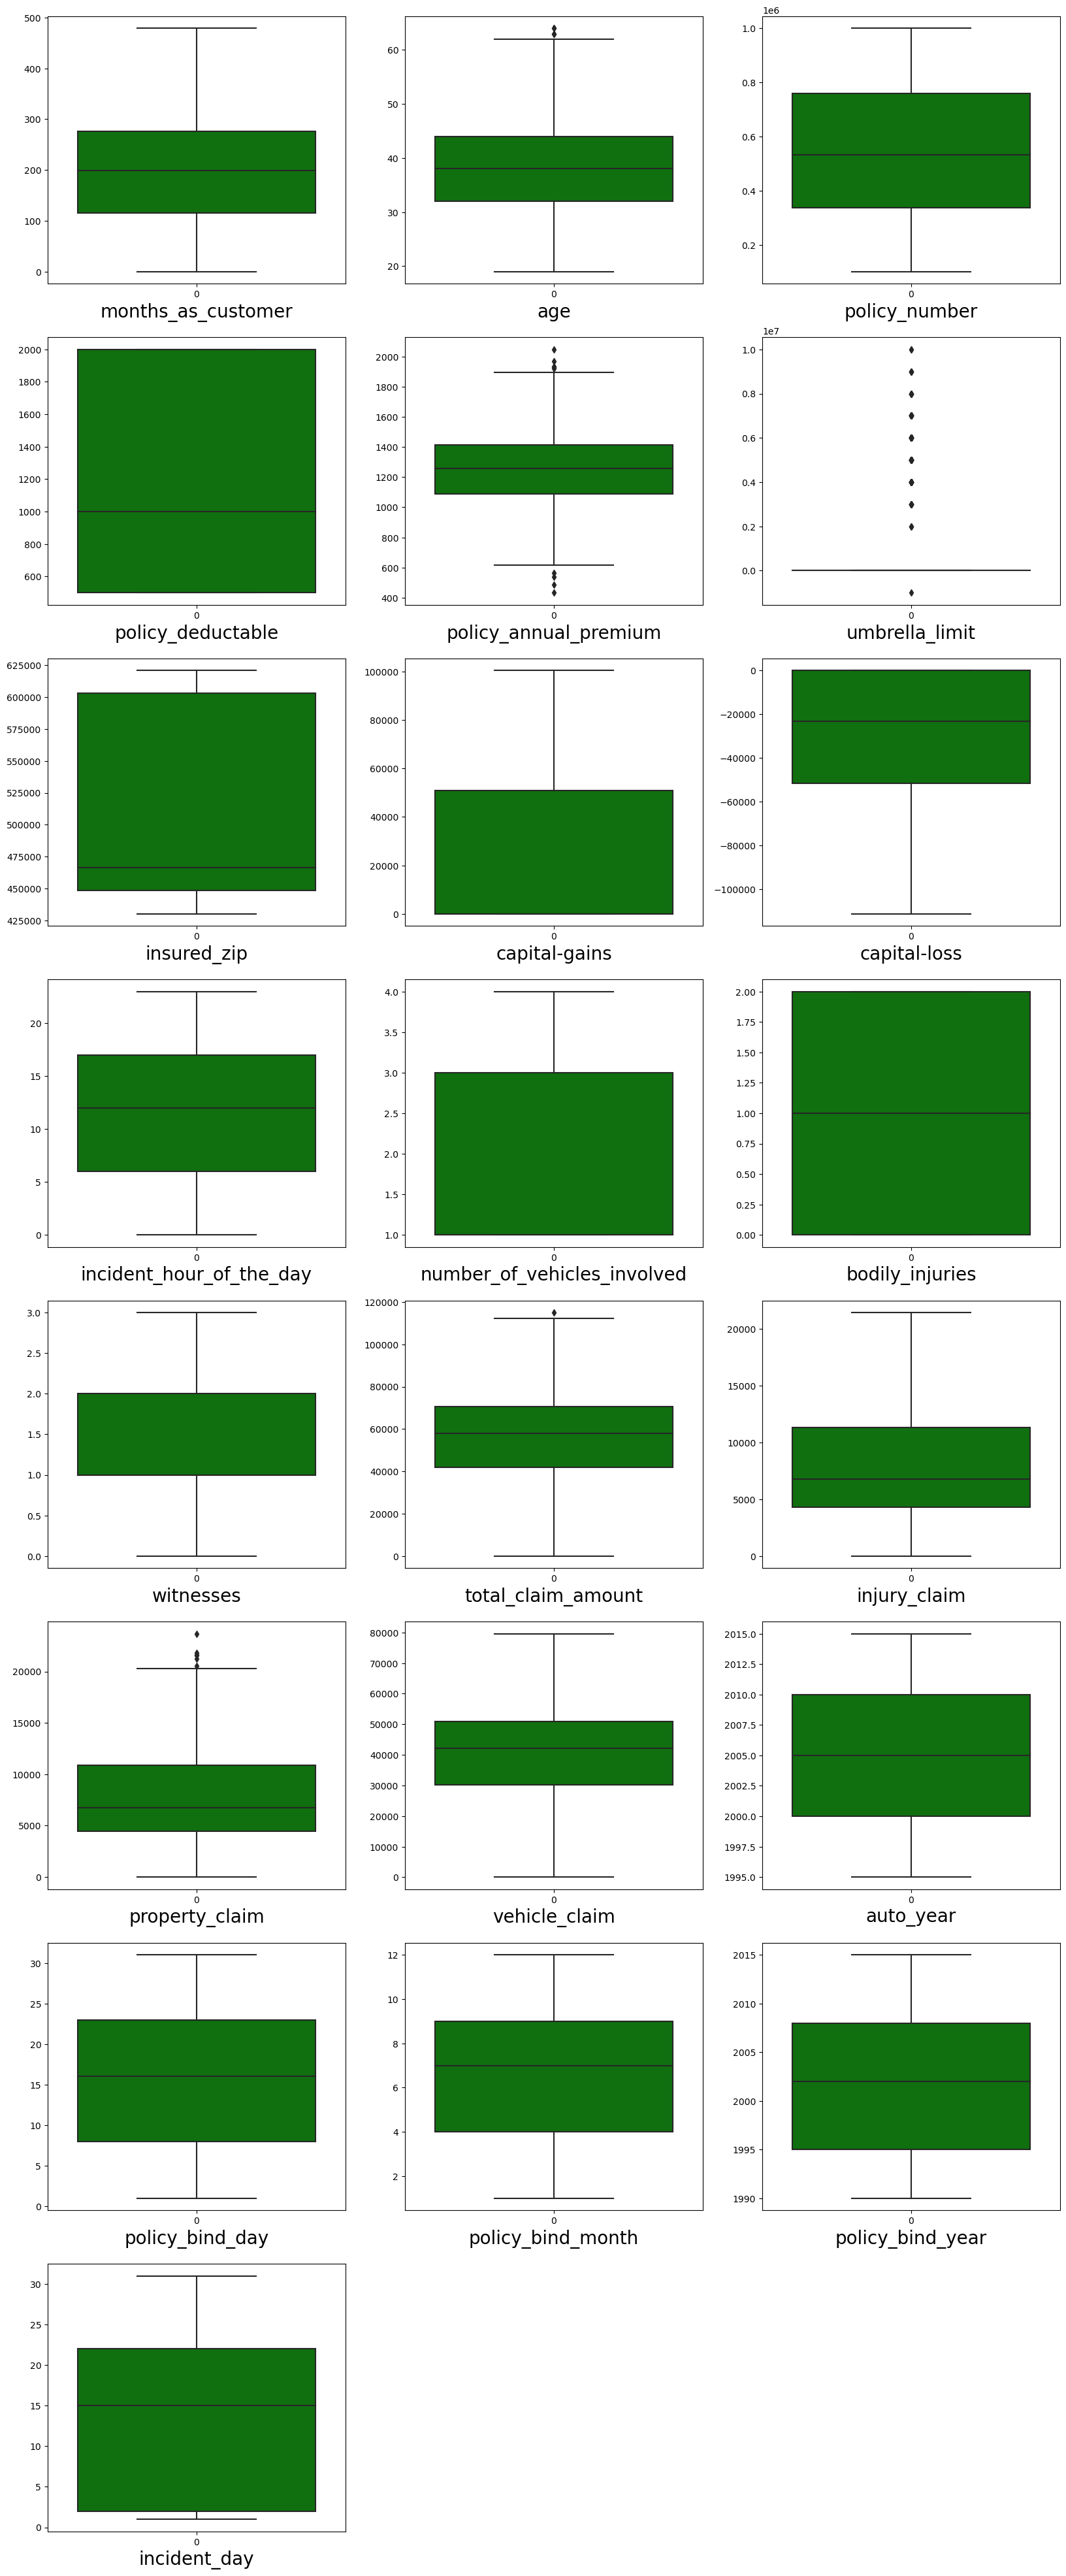

In [37]:
#checking outliers by boxplot
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in numerical_feature:
    if plotnumber<=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [38]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [39]:
df = remove_outliers_zscore(df,df.columns)
df

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                   328   48         521585             2               1000   
1                   228   42         342868             1               2000   
2                   134   29         687698             2               2000   
3                   256   41         227811             0               2000   
4                   228   44         367455             0               1000   
..                  ...  ...            ...           ...                ...   
995                   3   38         941851             2               1000   
996                 285   41         186934             0               1000   
997                 130   34         918516             2                500   
998                 458   62         533940             0               2000   
999                 456   60         556080             2               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  auto_year  fraud_reported  policy_bind_day  \
0                          4  ...       2004               1               17   
1                          4  ...       2007               1               27   
2                          6  ...       2007               0                9   
3                          6  ...       2014               1               25   
4                          0  ...       2009               0                6   
..                       ...  ...        ...             ...              ...   
995                        5  ...       2006               0               16   
996                        6  ...       2015               0                1   
997                        5  ...       1996               0               17   
998                        0  ...       1998               0               18   
999                        0  ...       2007               0               11   

     policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                   10              2014            25               1   
1                    6              2006            21               1   
2                    6              2000            22               2   
3                    5              1990             1              10   
4                    6              2014            17               2   
..                 ...               ...           ...             ...   
995                  7              1991            22               2   
996                  5              2014            24               1   
997                  2              2003            23               1   
998                 11              2011            26               2   
999                 11              1996            26               2   

     incident_year  CSL_Accidental  CSL_Overall  
0             2015               1            2  
1             2015               1            2  
2             2015               0            1  
3             2015               1            2  
4             2015               2            0  
..             ..

**Heat Map**

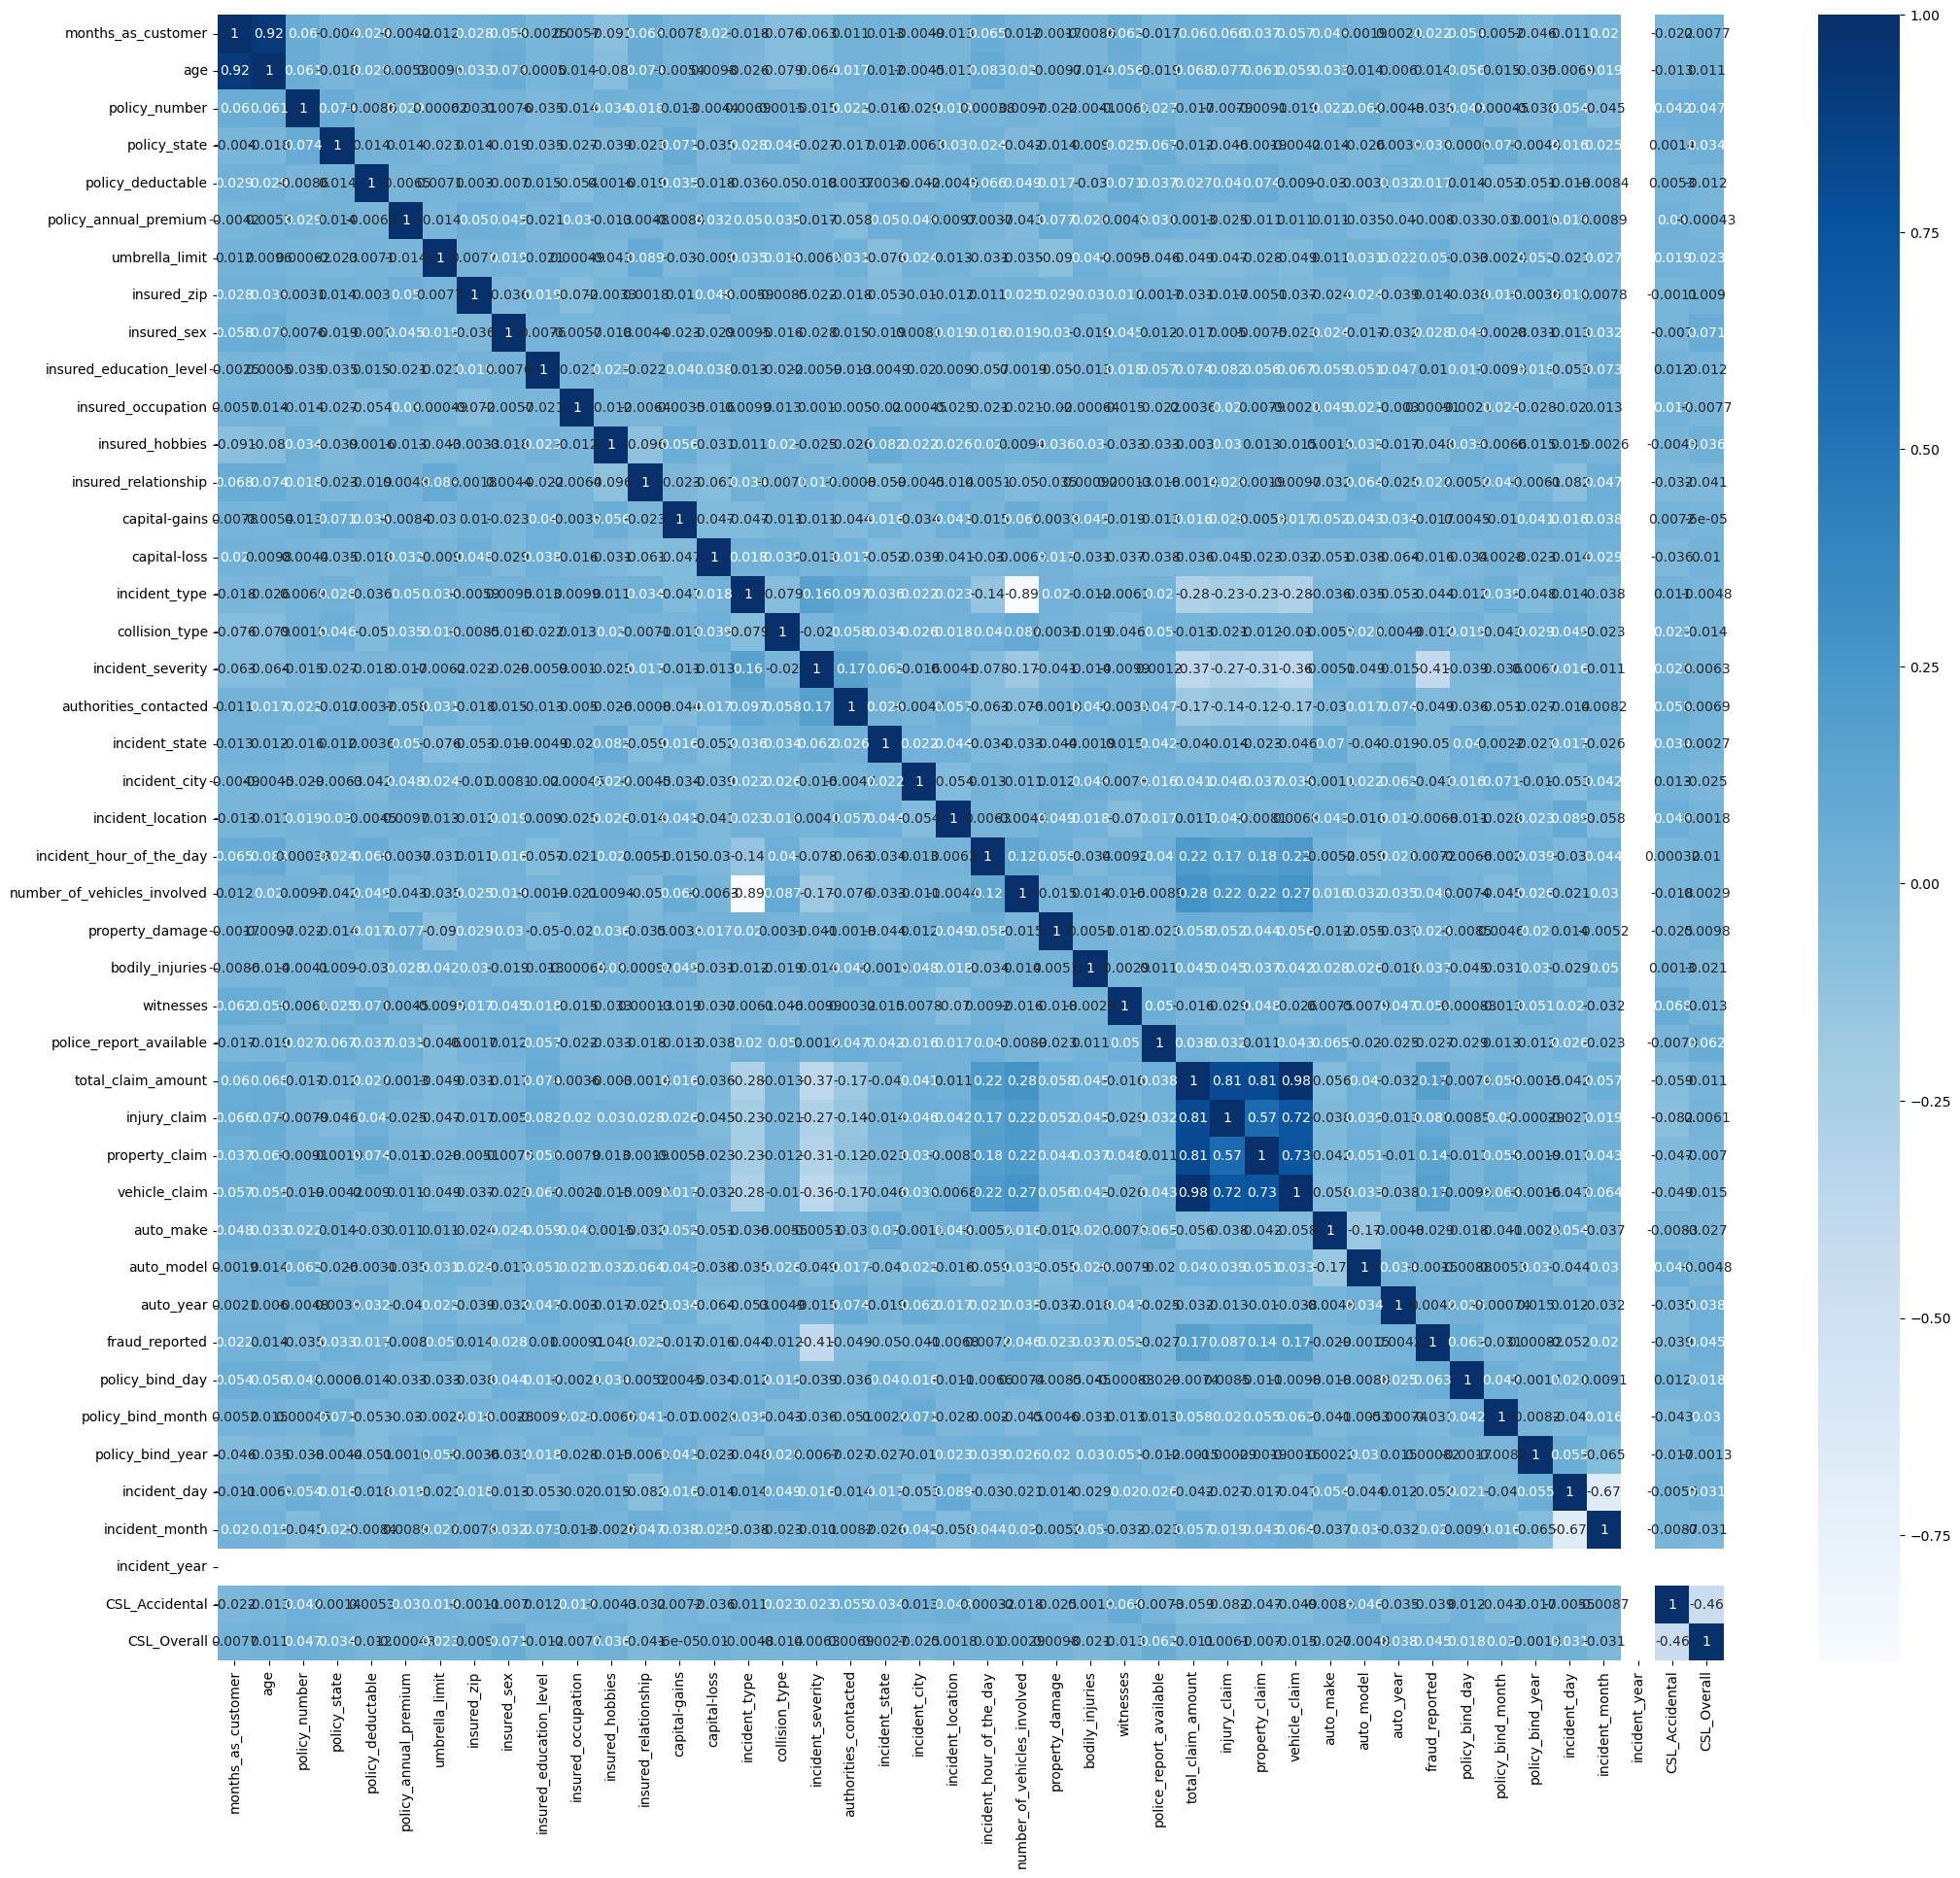

In [42]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),annot = True, linecolor='black',cmap="Blues")
plt.yticks(rotation=0);

some features are highly correlated with each other

**Checking Correlation with Target Column**

In [43]:
correlation_with_quality = df.corr()['fraud_reported'].abs().sort_values(ascending=False)
print(correlation_with_quality)

fraud_reported                 1.000000
incident_severity              0.405677
vehicle_claim                  0.172333
total_claim_amount             0.165041
property_claim                 0.140973
injury_claim                   0.086910
policy_bind_day                0.062602
witnesses                      0.052155
incident_day                   0.051649
incident_state                 0.050457
umbrella_limit                 0.050356
authorities_contacted          0.048752
insured_hobbies                0.048072
number_of_vehicles_involved    0.045825
CSL_Overall                    0.045193
incident_type                  0.044068
incident_city                  0.041002
CSL_Accidental                 0.038599
bodily_injuries                0.036601
policy_number                  0.035307
policy_state                   0.033416
policy_bind_month              0.030508
auto_make                      0.028546
insured_sex                    0.027622
police_report_available        0.026566


<Axes: >

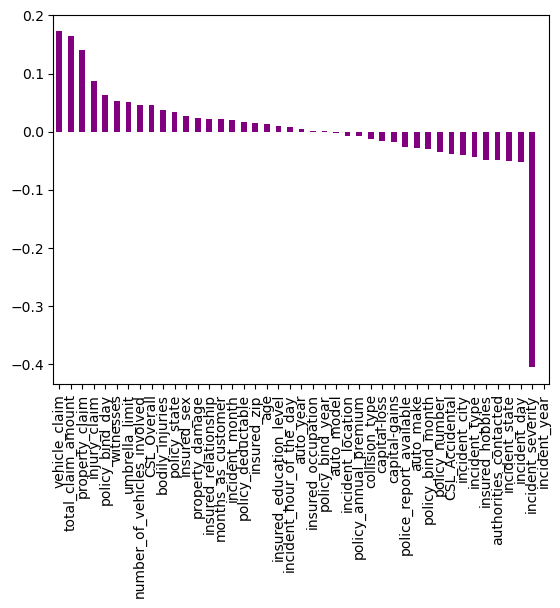

In [44]:
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar', color='purple')


In [45]:
unnecessary_columns = ['incident_year','insured_occupation','auto_model','auto_year','policy_bind_year','incident_hour_of_the_day']


In [46]:
df.drop(unnecessary_columns,axis=1,inplace=True)


**Checking Correlation between columns to columns**

In [47]:
#checking correlation
df_corr = df.corr()
df_corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922654       0.060260   
age                                    0.922654  1.000000       0.060810   
policy_number                          0.060260  0.060810       1.000000   
policy_state                          -0.003979 -0.018274       0.073850   
policy_deductable                      0.029014  0.029268      -0.008648   
policy_annual_premium                 -0.004210  0.005341       0.028905   
umbrella_limit                         0.012183  0.009622       0.000617   
insured_zip                            0.027627  0.033187       0.003077   
insured_sex                            0.057838  0.073431       0.007597   
insured_education_level               -0.002547  0.000495      -0.034806   
insured_hobbies                       -0.091161 -0.079876       0.034161   
insured_relationship                   0.067900  0.073960       0.017636   
capital-gains                          0.007765 -0.005402       0.013495   
capital-loss                           0.019925  0.009817      -0.004406   
incident_type                         -0.017963 -0.026339       0.006914   
collision_type                        -0.075550 -0.079240       0.001550   
incident_severity                     -0.062922 -0.063932      -0.015274   
authorities_contacted                  0.011462  0.016564       0.021737   
incident_state                         0.013142  0.011774      -0.016446   
incident_city                         -0.004890 -0.004492      -0.029075   
incident_location                     -0.013125 -0.010560       0.018980   
number_of_vehicles_involved            0.011667  0.019582       0.009668   
property_damage                       -0.001707 -0.009725      -0.022340   
bodily_injuries                       -0.008598 -0.014072      -0.004057   
witnesses                              0.061634  0.055780      -0.006134   
police_report_available               -0.016560 -0.018589       0.026985   
total_claim_amount                     0.060089  0.067852      -0.016554   
injury_claim                           0.066406  0.077340      -0.007901   
property_claim                         0.036649  0.061408      -0.009150   
vehicle_claim                          0.057476  0.059198      -0.018766   
auto_make                              0.048190  0.032650       0.021513   
fraud_reported                         0.021653  0.013763      -0.035307   
policy_bind_day                        0.053967  0.055801       0.049481   
policy_bind_month                      0.005194  0.014836       0.000448   
incident_day                          -0.010862 -0.006944       0.053688   
incident_month                         0.019957  0.018927      -0.045064   
CSL_Accidental                        -0.022346 -0.012761       0.041877   
CSL_Overall                            0.007718  0.010564       0.047434   

                             policy_state  policy_deductable  \
months_as_customer              -0.003979           0.029014   
age                             -0.018274           0.029268   
policy_number                    0.073850          -0.008648   
policy_state                     1.000000           0.014318   
policy_deductable                0.014318           1.000000   
policy_annual_premium            0.013918          -0.006525   
umbrella_limit                  -0.022568           0.007118   
insured_zip                      0.014477           0.002986   
insured_sex                     -0.019320          -0.007044   
insured_education_level         -0.034504           0.015475   
insured_hobbies                 -0.038602           0.001570   
insured_relationship            -0.023188          -0.018639   
capital-gains                    0.070839           0.034552   
capital-loss                    -0.034865          -0.018304   
incident_type                    0.028102          -0.035912   
collision_type                   0.04622

In [48]:
#We are writing this function to see those columns which are highly correlated with each other

correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [49]:
features_to_drop

{'age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'}

In [50]:
df.drop(columns=['injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'],axis=1,inplace=True)     #Age Column is not Considered

**VIF**

In [52]:
df1=df.copy()


In [53]:
#drop target column
df1.drop('fraud_reported',axis=1, inplace=True)

In [54]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [55]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [56]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

features       vif
0        months_as_customer  6.814695
1                       age  6.821857
2             policy_number  1.030185
3              policy_state  1.039510
4         policy_deductable  1.023522
5     policy_annual_premium  1.035515
6            umbrella_limit  1.040118
7               insured_zip  1.019856
8               insured_sex  1.028145
9   insured_education_level  1.035248
10          insured_hobbies  1.043867
11     insured_relationship  1.048101
12            capital-gains  1.031605
13             capital-loss  1.036551
14            incident_type  1.128654
15           collision_type  1.042703
16        incident_severity  1.194538
17    authorities_contacted  1.080048
18           incident_state  1.046393
19            incident_city  1.027478
20        incident_location  1.036249
21          property_damage  1.035842
22          bodily_injuries  1.024305
23                witnesses  1.032186
24  police_report_available  1.040737
25       total_claim_amount  1.301037
26                auto_make  1.044390
27          policy_bind_day  1.027261
28        policy_bind_month  1.036260
29             incident_day  1.849771
30           incident_month  1.843423
31           CSL_Accidental  1.310502
32              CSL_Overall  1.308028

Observation:
    
There is no Multicollinearty we are good to go For Prediction

**Splitting into Feature and Target column**

In [57]:
X= df.drop('fraud_reported', axis=1)
Y=df['fraud_reported']

In [58]:
#Skewness Check and if present will removew it

X.skew()


months_as_customer         0.364303
age                        0.478116
policy_number              0.035890
policy_state              -0.032200
policy_deductable          0.478464
policy_annual_premium      0.035686
umbrella_limit             1.776463
insured_zip                0.834003
insured_sex                0.138189
insured_education_level    0.002485
insured_hobbies           -0.059031
insured_relationship       0.076198
capital-gains              0.470407
capital-loss              -0.384896
incident_type              0.093061
collision_type            -0.035588
incident_severity          0.281538
authorities_contacted     -0.120423
incident_state            -0.148839
incident_city              0.047091
incident_location          0.002510
property_damage            0.860557
bodily_injuries            0.005597
witnesses                  0.029226
police_report_available    0.803919
total_claim_amount        -0.593346
auto_make                 -0.026157
policy_bind_day            0

In [59]:
skew = ['umbrella_limit','property_damage','police_report_available','total_claim_amount','incident_month']


In [60]:
pt = PowerTransformer(method='yeo-johnson')


In [61]:
X[skew] = pt.fit_transform(X[skew])


**Standardization**

In [62]:
sc=StandardScaler()

X=sc.fit_transform(X)

**Data Balancing**

In [63]:
sm=SMOTE()


x,y=sm.fit_resample(X,Y)



x.shape , y.shape


((1490, 33), (1490,))

# Model Building

In [64]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8053691275167785 on Random State = 19


In [65]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

**Defining All Classification Models**

In [66]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

**Model training**

In [67]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('--'*30)

Accuracy_Score of  LogisticRegression() is 80.53691275167785
Confusion Matrix of  LogisticRegression()  is 
 [[116  34]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.78      0.84      0.81       148

    accuracy                           0.81       298
   macro avg       0.81      0.81      0.81       298
weighted avg       0.81      0.81      0.81       298

------------------------------------------------------------
Accuracy_Score of  RidgeClassifier() is 78.85906040268456
Confusion Matrix of  RidgeClassifier()  is 
 [[111  39]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       150
           1       0.76      0.84      0.80       148

    accuracy                           0.79       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298

---------------------------

# GradientBoostingClassifier gave best accuracy score and minimum difference for generalise model

**Hyperparameter tuning on GradientBoostingClassifier**

In [68]:
param_grid = {
    'n_estimators': [200, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 4, 7]
}
param_grid

{'n_estimators': [200, 600, 1000],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [69]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [70]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=1000)

In [71]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8959731543624161

**RUC AOC Curve/Plot**

In [ ]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

**Confusion Matrix**

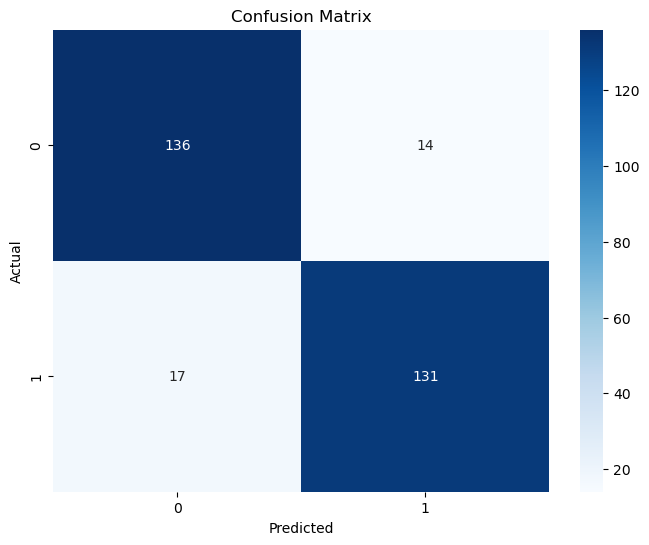

In [72]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Save Model**

In [73]:
joblib.dump(grid_search.best_estimator_,"INSURANCE_FRAUD.pkl")

['INSURANCE_FRAUD.pkl']